https://towardsdatascience.com/implementing-xgboost-from-scratch-6b7f2eb593c

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Sample data
year = [5,7,12,23,25,28,29,34,35,40]
salary = [82,80,103,118,172,127,204,189,99,166]

In [ ]:
df = pd.DataFrame(columns=['Years','Salary'])
df.Years = year
df.Salary = salary
df.head()

,Years,Salary
0,5,82
1,7,80
2,12,103
3,23,118
4,25,172


In [ ]:
for i in range(2):
  f = df.Salary.mean()
  if (i>0):
    df['f'+str(i)] = df['f' + str(i-1)] + df['h' + str(i)]
  else:
    df['f'+str(i)] = f
  df['y-f' + str(i)] = df.Salary - df['f' +str(i)]
  splitIndex = np.random.randint(0, df.shape[0]-1)
  a = []
  h_upper = df['y-f'+str(i)][0:splitIndex].mean()
  h_bottom = df['y-f'+ str(i)][splitIndex:].mean()
  for j in range(splitIndex):
    a.append(h_upper)
  for j in range(df.shape[0] - splitIndex):
    a.append(h_bottom)
  df['h'+str(i+1)] = a

df.head()

,Years,Salary,f0,y-f0,h1,f1,y-f1,h2
0,5,82,134.0,-52.0,-38.25,95.75,-13.75,-7.416667
1,7,80,134.0,-54.0,-38.25,95.75,-15.75,-7.416667
2,12,103,134.0,-31.0,-38.25,95.75,7.25,-7.416667
3,23,118,134.0,-16.0,-38.25,95.75,22.25,3.178571
4,25,172,134.0,38.0,25.50,159.50,12.50,3.178571


In [ ]:
for i in range(100):
  f = df.Salary.mean()
  if (i>0):
    df['f' + str(i)] = df['f'+ str(i-1)] + df['h'+str(i)]
  else:
    df['f' + str(i)] = f
  df['y-f' + str(i)] = df.Salary - df['f'+str(i)]
  splitIndex = np.random.randint(0, df.shape[0]-1)
  a = []
  h_upper = df['y-f' + str(i)][0:splitIndex].mean()
  h_bottom = df['y-f' + str(i)][splitIndex:].mean()
  for j in range(splitIndex):
    a.append(h_upper)
  for j in range(df.shape[0] - splitIndex):
    a.append(h_bottom)
  df['h'+str(i+1)] = a
df.head()

,Years,Salary,f0,y-f0,h1,f1,y-f1,h2,f2,y-f2,h3,f3,y-f3,h4,f4,y-f4,h5,f5,y-f5,h6,f6,y-f6,h7,f7,y-f7,h8,f8,y-f8,h9,f9,y-f9,h10,f10,y-f10,h11,f11,y-f11,h12,f12,y-f12,...,h87,f87,y-f87,h88,f88,y-f88,h89,f89,y-f89,h90,f90,y-f90,h91,f91,y-f91,h92,f92,y-f92,h93,f93,y-f93,h94,f94,y-f94,h95,f95,y-f95,h96,f96,y-f96,h97,f97,y-f97,h98,f98,y-f98,h99,f99,y-f99,h100
0,5,82,134.0,-52.0,-20.333333,113.666667,-31.666667,-17.916667,95.750000,-13.750000,9.277778,105.027778,-23.027778,7.105427e-15,105.027778,-23.027778,-23.027778,82.000000,0.000000,7.882275,89.882275,-7.882275,-18.606555,71.275720,10.724280,2.650605,73.926325,8.073675,2.842171e-15,73.926325,8.073675,1.421085e-15,73.926325,8.073675,-2.650605,71.275720,10.724280,6.323235,77.598955,4.401045,...,0.169852,82.922161,-0.922161,-0.922161,82.000000,0.000000,-2.142602,79.857398,2.142602,0.0,79.857398,2.142602,1.222671,81.080069,0.919931,0.251989,81.332058,0.667942,0.0,81.332058,0.667942,1.145501,82.477559,-0.477559,4.736952e-15,82.477559,-0.477559,-1.397490,81.080069,0.919931,-2.842171e-15,81.080069,0.919931,0.176414,81.256483,0.743517,0.743517,82.000000,0.000000,0.000000e+00
1,7,80,134.0,-54.0,-20.333333,113.666667,-33.666667,-17.916667,95.750000,-15.750000,9.277778,105.027778,-25.027778,7.105427e-15,105.027778,-25.027778,2.558642,107.586420,-27.586420,7.882275,115.468695,-35.468695,-18.606555,96.862140,-16.862140,2.650605,99.512745,-19.512745,2.842171e-15,99.512745,-19.512745,1.421085e-15,99.512745,-19.512745,-2.650605,96.862140,-16.862140,6.323235,103.185375,-23.185375,...,0.169852,81.737400,-1.737400,0.102462,81.839862,-1.839862,-2.142602,79.697260,0.302740,0.0,79.697260,0.302740,1.222671,80.919931,-0.919931,0.251989,81.171920,-1.171920,0.0,81.171920,-1.171920,1.145501,82.317421,-2.317421,4.736952e-15,82.317421,-2.317421,-1.397490,80.919931,-0.919931,-2.842171e-15,80.919931,-0.919931,0.176414,81.096345,-1.096345,-0.082613,81.013732,-1.013732,-6.315935e-15
2,12,103,134.0,-31.0,-20.333333,113.666667,-10.666667,-17.916667,95.750000,7.250000,9.277778,105.027778,-2.027778,7.105427e-15,105.027778,-2.027778,2.558642,107.586420,-4.586420,7.882275,115.468695,-12.468695,-18.606555,96.862140,6.137860,2.650605,99.512745,3.487255,2.842171e-15,99.512745,3.487255,1.421085e-15,99.512745,3.487255,-2.650605,96.862140,6.137860,6.323235,103.185375,-0.185375,...,0.169852,101.153338,1.846662,0.102462,101.255800,1.744200,-2.142602,99.113198,3.886802,0.0,99.113198,3.886802,-0.305668,98.807530,4.192470,0.251989,99.059519,3.940481,0.0,99.059519,3.940481,1.145501,100.205020,2.794980,4.736952e-15,100.205020,2.794980,0.349372,100.554393,2.445607,-2.842171e-15,100.554393,2.445607,0.176414,100.730807,2.269193,-0.082613,100.648194,2.351806,-6.315935e-15
3,23,118,134.0,-16.0,-20.333333,113.666667,4.333333,-17.916667,95.750000,22.250000,9.277778,105.027778,12.972222,7.105427e-15,105.027778,12.972222,2.558642,107.586420,10.413580,7.882275,115.468695,2.531305,7.974238,123.442933,-5.442933,2.650605,126.093537,-8.093537,2.842171e-15,126.093537,-8.093537,1.421085e-15,126.093537,-8.093537,1.135973,127.229511,-9.229511,6.323235,133.552746,-15.552746,...,0.169852,126.372284,-8.372284,0.102462,126.474746,-8.474746,-2.142602,124.332144,-6.332144,0.0,124.332144,-6.332144,-0.305668,124.026476,-6.026476,0.251989,124.278465,-6.278465,0.0,124.278465,-6.278465,-0.490929,123.787537,-5.787537,1.218073e-14,123.787537,-5.787537,0.349372,124.136909,-6.136909,-2.842171e-15,124.136909,-6.136909,0.176414,124.313323,-6.313323,-0.082613,124.230710,-6.230710,-6.315935e-15
4,25,172,134.0,38.0,-20.333333,113.666667,58.333333,11.944444,125.611111,46.388889,9.277778,134.888889,37.111111,7.105427e-15,134.888889,37.111111,2.558642,137.447531,34.552469,7.882275,145.329806,26.670194,7.974238,153.304044,18.695956,2.650605,155.954649,16.045351,2.842171e-15,155.954649,16.045351,1.421085e-15,155.954649,16.045351,1.135973,157.090622,14.909378,6.323235,163.413857,8.586143,...,0.169852,163.664077,8.335923,0.102462,163.766539,8.233461,1.428401,165.194941,6.80505

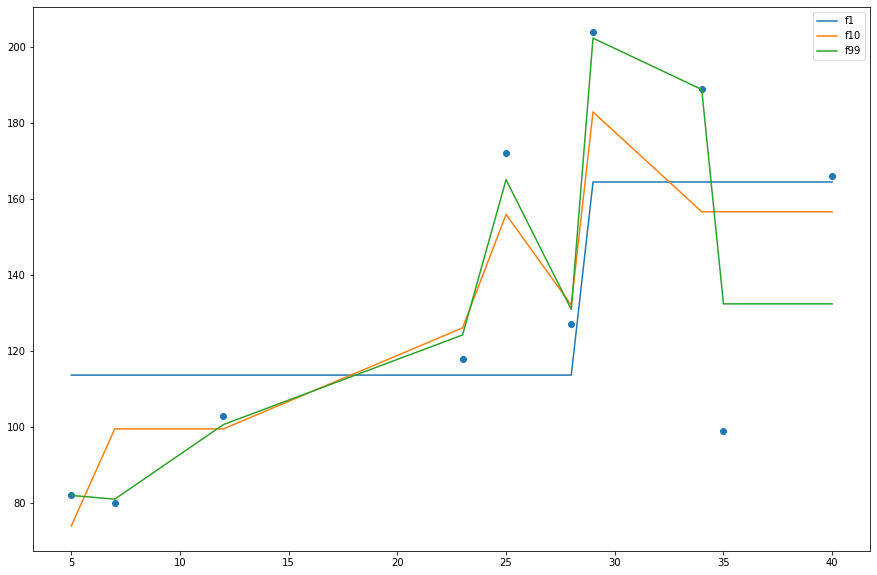

In [ ]:
plt.figure(figsize = (15,10))
plt.scatter(df.Years, df.Salary)
plt.plot(df.Years, df.f1, label = 'f1')
plt.plot(df.Years,df.f10, label = 'f10')
plt.plot(df.Years,df.f99,label = 'f99')
plt.legend()